In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, roc_auc_score
import pandas as pd
import subprocess


# Part A different r values

Return code:  0
Return code:  0


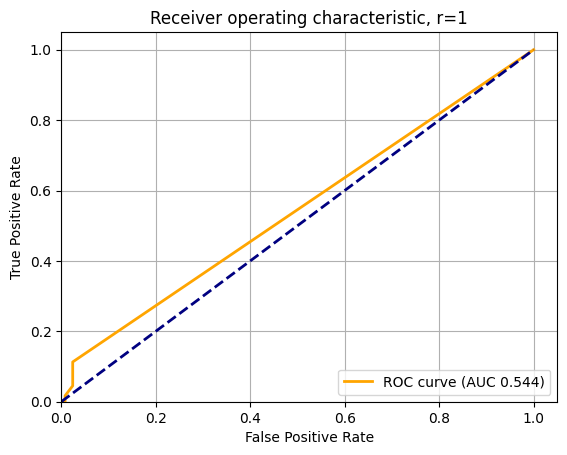

Return code:  0
Return code:  0


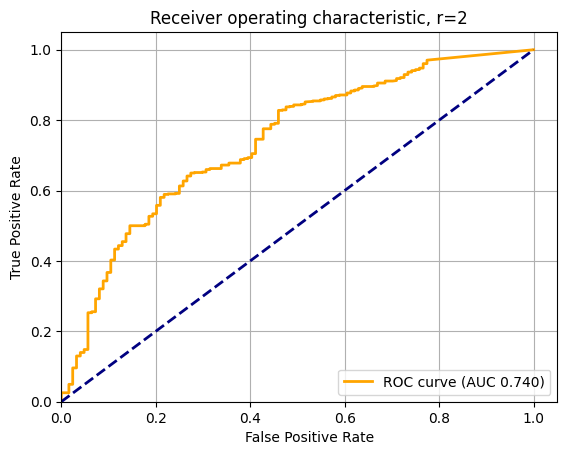

Return code:  0
Return code:  0


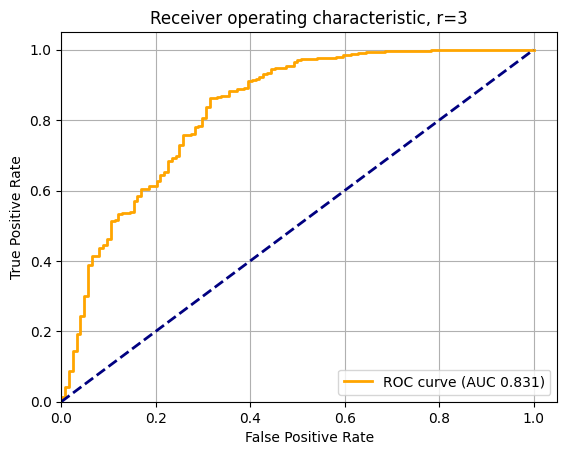

Return code:  0
Return code:  0


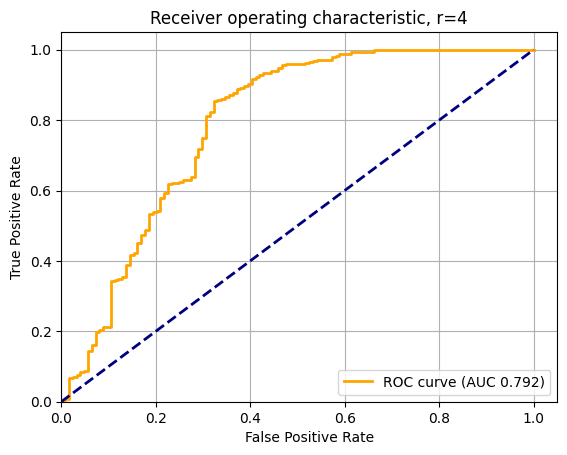

Return code:  0
Return code:  0


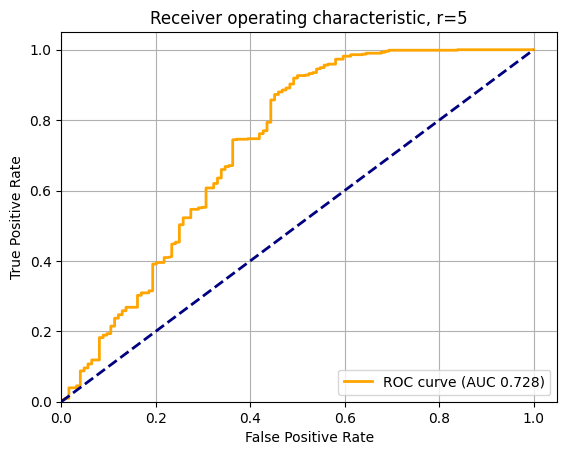

Return code:  0
Return code:  0


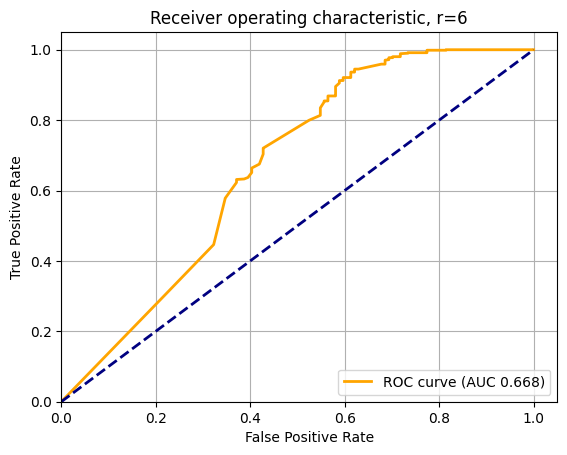

Return code:  0
Return code:  0


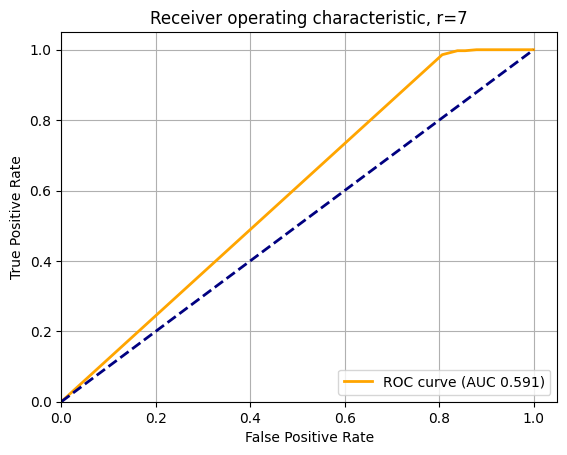

Return code:  0
Return code:  0


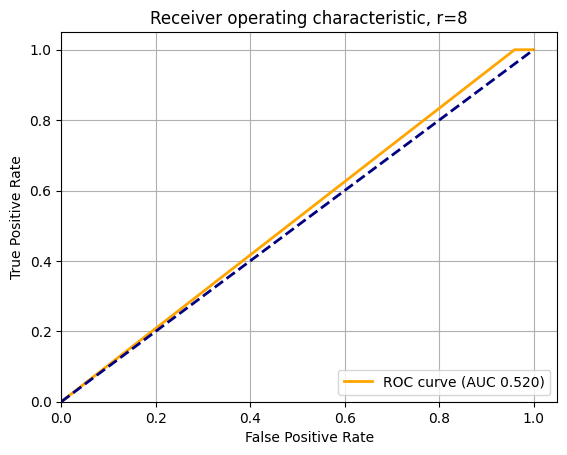

Return code:  0
Return code:  0


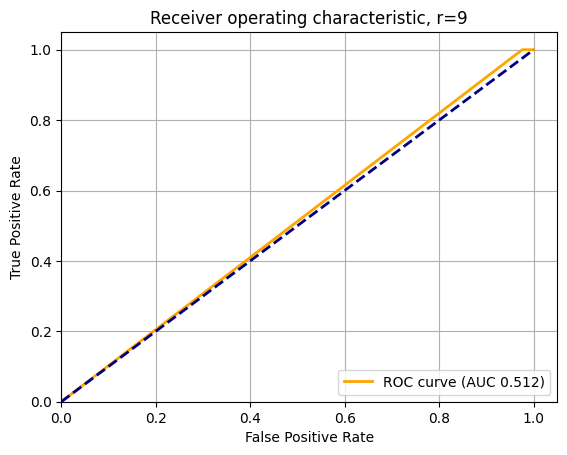

In [6]:
#run the awk commands -> 

#java -jar negsel2 .jar -self english.train -n 10 -r 4 -c -l < english.test | awk ’{n+= $1}END{print n/NR}’
#
#java -jar negsel2 .jar -self english.train -n 10 -r 4 -c -l < tagalog.test | awk
#’{n+= $1}END{print n/NR}’

for i in range(1,10):
    #Run the java for english test
    command = "java -jar negative-selection/negsel2.jar -self negative-selection/english.train -n 10 -r "+str(i)+" -c -l"
    p = subprocess.Popen(command.split(), stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)


    testfile = open("negative-selection/english.test").readlines()

    entropies = []

    for line in testfile:
        #print(line)
        p.stdin.write(line)
        p.stdin.flush()
        output = p.stdout.readline().strip()
        entropies.append(output)

    p.stdin.close()
    return_code = p.wait()
    print("Return code: ", return_code)

    error_output = p.stderr.read()
    if error_output:
        print("Error output:", error_output)


    scores_english = [float(item.strip()) for item in entropies]

    file = open(f"scores{i}.txt", 'w')
    for a  in entropies:

        file.write(str(a) + "\n")

    #run it for tagalog test
    command = "java -jar negative-selection/negsel2.jar -self negative-selection/english.train -n 10 -r "+str(i)+" -c -l"
    p = subprocess.Popen(command.split(), stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)


    testfile = open("negative-selection/tagalog.test").readlines()

    entropies = []

    for line in testfile:
        #print(line)
        p.stdin.write(line)
        p.stdin.flush()
        output = p.stdout.readline().strip()
        entropies.append(output)

    p.stdin.close()
    return_code = p.wait()
    print("Return code: ", return_code)

    error_output = p.stderr.read()
    if error_output:
        print("Error output:", error_output)

    scores_tagalog = [float(item.strip()) for item in entropies]

    scores = np.concatenate([scores_tagalog, scores_english])
    labels = np.zeros(len(scores))
    labels[:len(scores_tagalog)] = 1
    labels[len(scores_tagalog):] = 0
    fpr, tpr, thresholds = roc_curve(labels, scores)

    plt.figure()
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC %0.3f)' % auc(fpr, tpr))
    plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic, r=' + str(i))
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()


# Part A Different languages

In [17]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def negativeselect(wordlist, r):
    # Run the java for english test
    command = f"java -jar negative-selection/negsel2.jar -self negative-selection/english.train -n 10 -r {r} -c -l"
    p = subprocess.Popen(command.split(), stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)

    testfile = open("negative-selection/english.test").readlines()
    entropies = []

    for line in testfile:
        p.stdin.write(line)
        p.stdin.flush()
        output = p.stdout.readline().strip()
        entropies.append(output)

    p.stdin.close()
    return_code = p.wait()
    print("Return code: ", return_code)

    error_output = p.stderr.read()
    if error_output:
        print("Error output:", error_output)

    scores_english = [float(item.strip()) for item in entropies]

    with open(f"scores_{wordlist}.txt", 'w') as file:
        for a in entropies:
            file.write(str(a) + "\n")

    # Run it for tagalog test
    command = f"java -jar negative-selection/negsel2.jar -self negative-selection/english.train -n 10 -r {r} -c -l"
    p = subprocess.Popen(command.split(), stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)

    testfile = open(f"negative-selection/lang/{wordlist}.txt").readlines()
    entropies = []

    for line in testfile:
        p.stdin.write(line)
        p.stdin.flush()
        output = p.stdout.readline().strip()
        entropies.append(output)

    p.stdin.close()
    return_code = p.wait()
    #print("Return code: ", return_code)

    error_output = p.stderr.read()
    if error_output:
        print("Error output:", error_output)

    scores_tagalog = [float(item.strip()) for item in entropies]

    scores = np.concatenate([scores_tagalog, scores_english])
    labels = np.zeros(len(scores))
    labels[:len(scores_tagalog)] = 1
    labels[len(scores_tagalog):] = -1
    fpr, tpr, thresholds = roc_curve(labels, scores)
    print(f"Wordlist: {wordlist}, r:{r}, auc: {auc(fpr, tpr)}")

    #plt.figure()
    #plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC %0.3f)' % auc(fpr, tpr))
    #plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
    #plt.xlim([0.0, 1.05])
    #plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title('Receiver operating characteristic '+ wordlist)
    #plt.legend(loc="lower right")
    #plt.grid()
    #plt.show()
#for i in range(1,10):
    #negativeselect("hiligaynon", i)
    #negativeselect("middle-english", i)
    #negativeselect("plautdietsch",i)
    #negativeselect("xhosa", i)
negativeselect("hiligaynon", 9)
negativeselect("middle-english", 9)
negativeselect("plautdietsch",9)
negativeselect("xhosa", 9)


Return code:  0
Wordlist: hiligaynon, r:9, auc: 0.5120967741935484
Return code:  0
Wordlist: middle-english, r:9, auc: 0.5120967741935484
Return code:  0
Wordlist: plautdietsch, r:9, auc: 0.5120967741935484
Return code:  0
Wordlist: xhosa, r:9, auc: 0.5120967741935484


# B Unix

In [18]:
labels_cert = []
tests_cert = []
scores_cert = []

labels_unm = []
tests_unm = []
scores_unm = []

def distributeIntoChunks(input, n):
    chunks = []
    for i in range(len(input)):
        if i+n <= len(input):
            substr = input[i:n]
            chunks.append(substr)

    return chunks

def plotter(fpr,tpr):
    plt.figure()
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC %0.3f)' % auc(fpr, tpr))
    plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic cert ' + str(i))
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()


for n in range(1,8):
    for r in range(1,n+1):
        #scoresfile = open('aucscores.txt', 'w')
        print(f'{n}|{r}\n')
        for i in range(1,4):
            file = open(f'negative-selection/syscalls/snd-cert/snd-cert.{i}.labels')
            labels_cert.append(file.readlines())
            #print(f"{i} | {n} | {r}")
            if(not isinstance(labels_cert[i-1][0], int) ):
                labels_cert[i-1] = [int(item.strip()) for item in labels_cert[i-1]]

            file = open(f'negative-selection/syscalls/snd-cert/snd-cert.{i}.test')
            tests_cert.append(file.readlines())
            tests_cert[i-1] = [(item.strip()) for item in tests_cert[i-1]]

            file = open(f'negative-selection/syscalls/snd-unm/snd-unm.{i}.labels')
            labels_unm.append(file.readlines())
            if(not isinstance(labels_cert[i-1][0], int) ):
                labels_unm[i-1] = [int(item.strip()) for item in labels_unm[i-1]]

            file = open(f'negative-selection/syscalls/snd-unm/snd-unm.{i}.test')
            tests_unm.append(file.readlines())
            tests_unm[i-1] = [(item.strip()) for item in tests_unm[i-1]]

            command = f"java -jar negative-selection/negsel2.jar -self negative-selection/syscalls/snd-cert/snd-cert.train -n {n} -r {r} -c -l"
            p = subprocess.Popen(command.split(), stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)

            entropies = []

            for line in tests_cert[i-1]:
                p.stdin.write(line + '\n')
                p.stdin.flush()
                output = p.stdout.readline().strip().split(' ')
                output = [float(item) for item in output]
                entropies.append(np.mean(output))

            p.stdin.close()
            return_code = p.wait()
            #print("Return code: ", return_code)

            error_output = p.stderr.read()
            if error_output:
                print("Error output:", error_output)

            #print(entropies)

            fpr, tpr, thresholds = roc_curve(labels_cert[i-1], entropies)

            # plotter(fpr, tpr)

            command = f"java -jar negative-selection/negsel2.jar -self negative-selection/syscalls/snd-unm/snd-unm.train -n {n} -r {r} -c -l"
            p = subprocess.Popen(command.split(), stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)

            entropy = []

            for line in tests_unm[i-1]:
                p.stdin.write(line + '\n')
                p.stdin.flush()
                output = p.stdout.readline().strip().split(' ')
                output = [float(item) for item in output]
                entropy.append(np.mean(output))

            p.stdin.close()
            return_code = p.wait()
            print("Return code: ", return_code)

            error_output = p.stderr.read()
            if error_output:
                print("Error output:", error_output)

            #print(entropy)

            fpr2, tpr2, thresholds = roc_curve(labels_cert[i-1], entropy)

            #plotter(fpr2,tpr2)

            
            print(f'cert {i}: {auc(fpr,tpr)}, unm {i}: {auc(fpr2, tpr2)}\n')
        print(f"-----------------------------------------\n")

1|1

Return code:  0
cert 1: 0.7676000000000001, unm 1: 0.4222

Return code:  0
cert 2: 0.8132199999999999, unm 2: 0.5852200000000001

Return code:  0
cert 3: 0.8414999999999999, unm 3: 0.49524

-----------------------------------------

2|1

Return code:  0
cert 1: 0.784, unm 1: 0.4202

Return code:  0
cert 2: 0.82238, unm 2: 0.5870200000000001

Return code:  0
cert 3: 0.8512199999999999, unm 3: 0.48566

-----------------------------------------

2|2

Return code:  0
cert 1: 0.786, unm 1: 0.42740000000000006

Return code:  0
cert 2: 0.8232999999999999, unm 2: 0.5830200000000001

Return code:  0
cert 3: 0.8525399999999999, unm 3: 0.49314

-----------------------------------------

3|1

Return code:  0
cert 1: 0.8, unm 1: 0.42140000000000005

Return code:  0
cert 2: 0.8294199999999999, unm 2: 0.58728

Return code:  0
cert 3: 0.86334, unm 3: 0.48552

-----------------------------------------

3|2

Return code:  0
cert 1: 0.8008, unm 1: 0.4196000000000001

Return code:  0
cert 2: 0.82894,